# Case - 成型機PHM,  異常偵測 - MAD

Copyright © 2019 Hsu Shih-Chieh

anormaly detection

算法筆記: https://hackmd.io/IF37w8EpS86SAxSMzVYsFA

In [10]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy import sparse, stats
import seaborn as sns
import statsmodels.api as sm

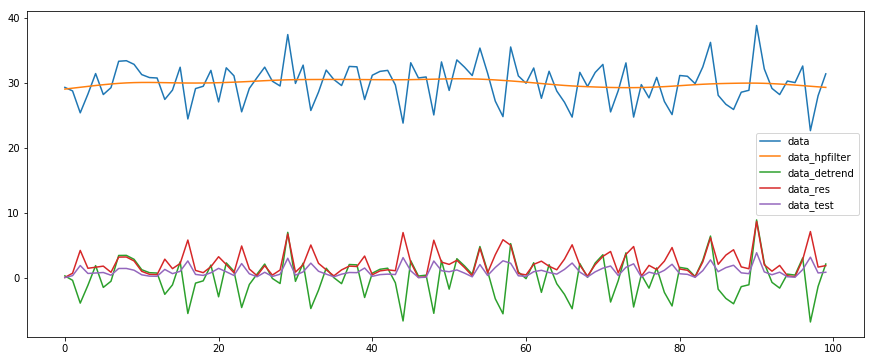

In [11]:
data = np.random.normal(30, 3, 100)
data_detrend, data_hpfilter = sm.tsa.filters.hpfilter(data, lamb=1000)
data_detrend = pd.Series(data_detrend)
data_res = (data_detrend-data_detrend.median()).abs() #殘差 
data_test = (data_detrend-data_detrend.median()).abs() / (data_detrend.mad() + 1e-12) #殘差除以mad 

plt.figure(figsize=(15,6))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.plot(data_test, label='data_test')
plt.legend()


## 產生一組數據

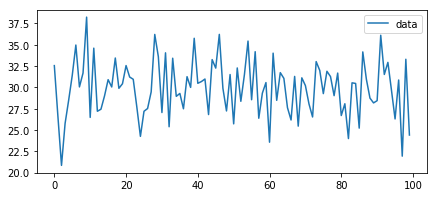

In [3]:
plt.figure(figsize=(7,3))
plt.plot(data, label='data')
plt.legend()

## 找平滑曲線

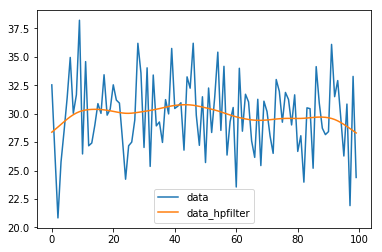

In [4]:
## plt.figure(figsize=(7,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.legend()


## De-trend

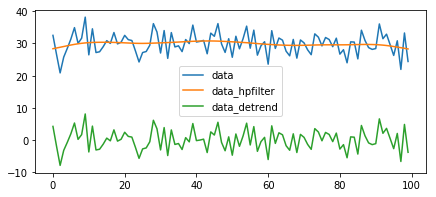

In [5]:
plt.figure(figsize=(7,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.legend()


## 殘差 
abs((x-x_median))


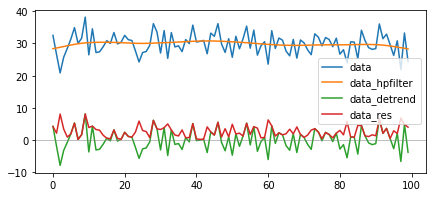

In [6]:
plt.figure(figsize=(7,3))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.axhline(0, lw=0.5, c='gray')
plt.legend()

## 殘差/平均差距
平均差距 = mean(x-x_mean)  
殘差/平均差距 = 殘差是平均差距的幾倍？, ex: 殘差是3, 平均差距是1.5, 則殘差/平均差距=2, 把殘差絕對值轉換成相對值

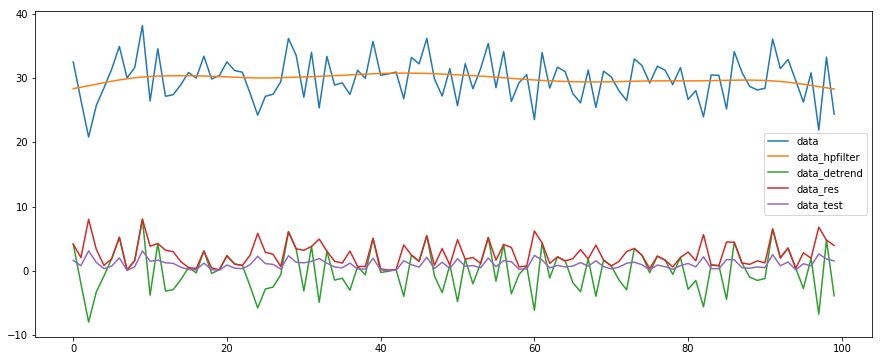

In [7]:
plt.figure(figsize=(15,6))
plt.plot(data, label='data')
plt.plot(data_hpfilter, label='data_hpfilter')
plt.plot(data_detrend, label='data_detrend')
plt.plot(data_res, label='data_res')
plt.plot(data_test, label='data_test')
plt.legend()

## 殘差/平均差距 = 用來檢測是否為異常的的數據
- 如何知道是否是異常？ -> 極端值就是異常 -> 分佈在比較邊邊的就是極端值

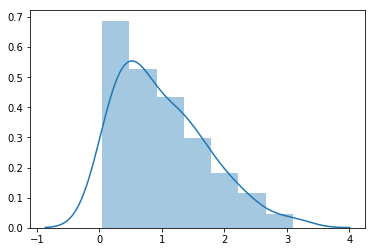

In [8]:
sns.distplot(data_test) #分佈

## 從統計的觀點計算臨界值
- 首先用手上的數據, 推估整體的數據分佈   
(ex: 一整天可能做3000多個模次, 但我們只有拿其中的50筆數據, 所以我們要用這50筆的平均值, 標準差來推估3000多個模次的資料分佈範圍)
- 假設：95%的數據是正常的 -> 找到95%的數據分佈範圍在哪裡 -> 臨界值

mean=0.9962306826169174, std=0.8144148846619873


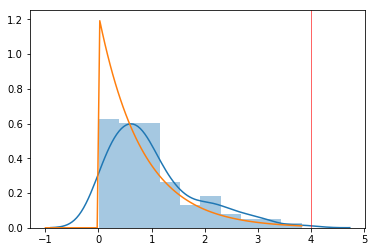

In [15]:
print(f"mean={data_test.mean()}, std={data_test.std()}")
R = stats.expon.interval(0.95, loc=data_test.mean(), scale=data_test.std())
sns.distplot(data_test) #分佈
plt.axvline(R[1], c='red',lw=0.6)
x = np.linspace(-1, max(data_test), len(data_test))
plt.plot(x, stats.expon.pdf(x, 0, data_test.std()))